<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [37]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

[0 0 0 ... 2 2 2]


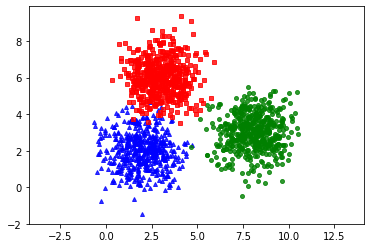

In [4]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [49]:
m = len(X)
k = np.random.randint(m, size=3)
c = np.empty(m)
mean_k = X[k]
J = np.empty(3)

print(k)
print(mean_k)

[1466  857  433]
[[3.5770059  4.80285093]
 [7.34627379 2.94474507]
 [1.99964578 3.53608398]]


In [50]:
running = True

while running:
    for i in range(0, m):
        c[i] = np.argmin(np.linalg.norm(X[i] - mean_k, axis=1))

    for i in range(0, 3):
        mean_k[i] = np.mean(X[np.where(c==i)], axis=0)
        J_prev = J
        J[i] = (1/m) * np.sum(np.linalg.norm(X[np.where(c==i)] - mean_k[i]), axis=0)
        print(J)

        comparison = J_prev == J
        if comparison.all():
            running = False

print(mean_k)



[1.90494887e-002 6.67976753e-321 4.07604158e-321]
[1.90494887e-002 2.09106310e-002 4.07604158e-321]
[0.01904949 0.02091063 0.02373905]
[[3.11770317 6.05888463]
 [8.0493495  3.0491942 ]
 [1.96794632 2.11415268]]


In [ ]:
running = True

while running:
    for i in range(0, m):
        c[i] = np.argmin(np.linalg.norm(X[i] - mean_k, axis=1))

    for i in range(0, 3):
        mean_k[i] = np.mean(X[np.where(c==i)], axis=0)
        J_prev = J
        J[i] = (1/m) * np.sum(np.linalg.norm(X[np.where(c==i)] - mean_k[i]), axis=0)
        print(J)

        comparison = J_prev == J
        if comparison.all():
            running = False

print(mean_k)



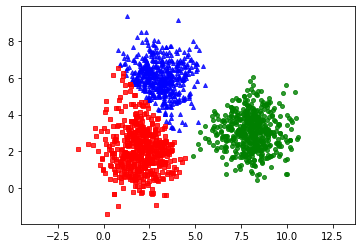

In [51]:
kmeans_display(X, c)